## Project and Data Description

### Paper Reference
https://www.mdpi.com/2227-9040/10/7/239

### Data Collection Method
Data was collected using an external sensor. The system was designed to continuously sample radon levels in real time.

* Radon is measured in Bq/m^3
* Temperature is measured in Celsius
* Relative Humidity %
* Pressure is measured in mbar
* TVOC is Total Volatile Organic Compounds
* State shows whether the ventiliation is switched on or off

### Description
The tests are performed to create a sensor and ventilation system to monitor and control the radon levels in the room. When the radon concentration for the next 10 minutes is predicted to be above the recommended 300 Bq/m^3 threshold the ventilation system is turned on and when the radon level is measured to be below the recommended threshold it is turned off. The experiment showed the ventilation has a positive effect on radon control.

### Results
The results showed that the prediction of radon concentrations can be successfully achieved using only previous concentrations and the state variable. The model is capable of forecasting only at one timestamp (10 min). It found that of all the measurements taken, it is enough to use the time series of radon measurements to make correct predictions with the other measurements of humidity, temperature and pressure providing very little useful information.

### Import Libraries

In [4]:
!pip install tensorflow

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Data

In [6]:
df = pd.read_csv('../data/radon-data.csv')
df.head()

,id,time,radon,temperature,humidity,pressure,tvoc,sensor_id,state,state_time
0,21906,1569405062,202,25,50,1015,0,2,Off,1569404979
1,21907,1569405663,258,25,51,1015,0,2,On,1569405215
2,21908,1569406264,202,24,51,1015,0,2,Off,1569405671
3,21909,1569406865,182,24,51,1015,0,2,Off,1569406848
4,21910,1569407466,189,24,51,1015,0,2,Off,1569406866


### Clean Data

In [7]:
df.time = pd.to_datetime(df['time'], unit='s', origin='unix')      # date parse
df = df.drop(columns = ["id", "sensor_id", "state_time"])  # drop useless columns
df.state = (df.state == "On").astype(int)                          # binarize state
df.head()

,time,radon,temperature,humidity,pressure,tvoc,state
0,2019-09-25 09:51:02,202,25,50,1015,0,0
1,2019-09-25 10:01:03,258,25,51,1015,0,1
2,2019-09-25 10:11:04,202,24,51,1015,0,0
3,2019-09-25 10:21:05,182,24,51,1015,0,0
4,2019-09-25 10:31:06,189,24,51,1015,0,0


## Data Analysis

### Temperature and Radon Chart

Text(0, 0.5, 'Radon')

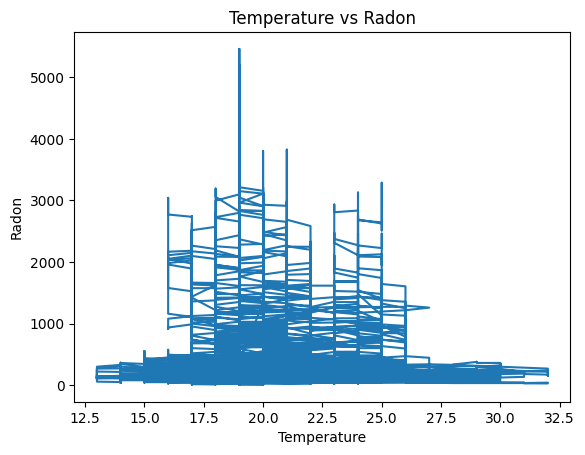

In [8]:
plt.plot(df.temperature, df.radon)
plt.title("Temperature vs Radon")
plt.xlabel("Temperature")
plt.ylabel("Radon")


Text(0, 0.5, 'Radon')

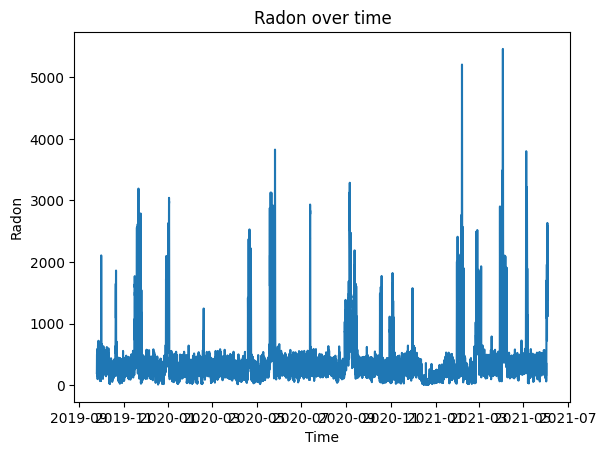

In [9]:
plt.plot(df.time, df.radon)
plt.title("Radon over time")
plt.xlabel("Time")
plt.ylabel("Radon")

### Discrete Statistics

In [10]:
data = {'Stats': ['Maximum', 'Minimum', 'Mean', 'Median'],
    'Radon': [df.radon.max(), df.radon.min(), df.radon.mean(), df.radon.median()],
    'Temperature': [df.temperature.max(), df.temperature.min(), df.temperature.mean(), df.temperature.median()],
    'Humidity': [df.humidity.max(), df.humidity.min(), df.humidity.mean(), df.humidity.median()],
    'Pressure': [df.pressure.max(), df.pressure.min(), df.pressure.mean(), df.pressure.median()]}
d = pd.DataFrame(data)
d.head()

,Stats,Radon,Temperature,Humidity,Pressure
0,Maximum,5461.000000,32.00000,78.000000,1033.000000
1,Minimum,5.000000,13.00000,25.000000,976.000000
2,Mean,369.434591,20.16525,51.132602,1012.805263
3,Median,262.000000,20.00000,51.000000,1013.000000


In [11]:
dtradon = []
for i in df.radon:
    if (df.radon[i] < df.radon[i+1]):
        dtradon.append(df.radon[i])

display = {'Stats': ['Max', 'Min', 'Mean', 'Median'],
           'Radon': [max(dtradon), min(dtradon), np.mean(dtradon), np.median(dtradon)]}
p = pd.DataFrame(display)
p.head()


,Stats,Radon
0,Max,2087.000000
1,Min,21.000000
2,Mean,357.964313
3,Median,340.000000


In [12]:
df_summer = df.iloc[36000:48000]

In [16]:
df_summer.describe()

,radon,temperature,humidity,pressure,tvoc,state
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,283.706083,23.478917,54.839250,1012.847000,74.512083,0.485333
std,176.631011,1.451688,4.692413,4.378111,67.313688,0.499806
min,42.000000,19.000000,39.000000,998.000000,0.000000,0.000000
25%,212.000000,22.000000,52.000000,1010.000000,30.000000,0.000000
50%,266.000000,24.000000,55.000000,1013.000000,57.000000,0.000000
75%,330.000000,25.000000,58.000000,1016.000000,97.000000,1.000000
max,2934.000000,26.000000,66.000000,1022.000000,1155.000000,1.000000
